In [19]:
#Importing required libraries
import pandas as pd                                             #as we have tabluar data
import seaborn as sns                                           #for visualization
import matplotlib.pyplot as plt                                 #for visualization
from sklearn.model_selection import train_test_split            #for divding data into train and test
from sklearn.preprocessing import StandardScaler, LabelEncoder  #(Standard Scaler)to normalize numerical features & (Label Encoder)convert text labels.
from sklearn.impute import SimpleImputer                        #Hnadle  missing values
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.metrics import accuracy_score, confusion_matrix    #evluate model performance


In [20]:
# Load the dataset
df = pd.read_csv('tested.csv')

# Basic Exploratory Data Analysis (EDA)
print("First few rows of the data:")
print(df.head())  # Shows a sample of the data
print("\nMissing Values:")
print(df[['Age', 'Sex', 'Survived']].isnull().sum())  # Checks for missing data in key columns
print("\nSurvival Rate:")
print(df['Survived'].value_counts(normalize=True))  # Shows % of passengers who survived



First few rows of the data:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing Values:
Age         86
Sex          0
Survived   

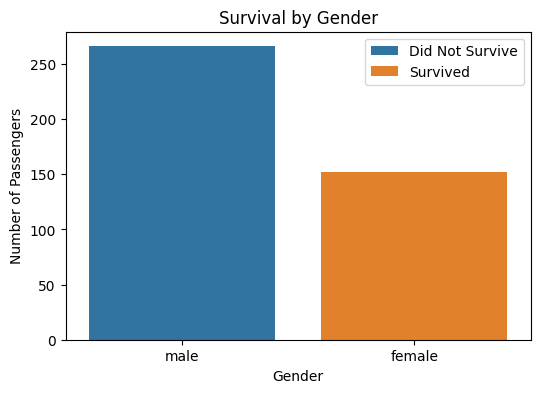

In [21]:
# Graph 1: Survival by Gender( representing men/women likely to survive)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.savefig('survival_by_gender.png')
plt.show()



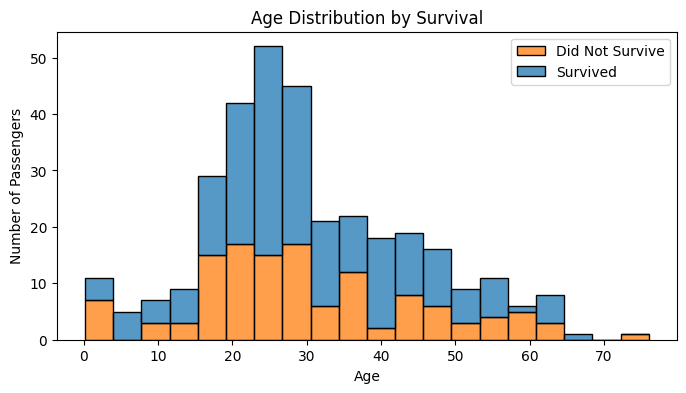

In [22]:
# Graph 2: Age Distribution by Survival
# Why: To see if age affects survival chances
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.savefig('age_by_survival.png')
plt.show()



In [23]:
# Preprocess the data
# Why: To prepare the data for the model by cleaning and converting it to numbers
def preprocess_data(df):
    # Use only Sex and Age
    # Why: These are simple and strongly related to survival
    features = ['Sex', 'Age']
    X = df[features].copy()
    y = df['Survived']

    # Fill missing Age values with the median (middle value)
    # Why: Some passengers don't have Age; median is a simple way to fill gaps
    imputer = SimpleImputer(strategy='median')
    X['Age'] = imputer.fit_transform(X[['Age']])

    # Convert Sex (male/female) to numbers (0/1)
    # Why: The model needs numbers, not text
    le = LabelEncoder()
    X['Sex'] = le.fit_transform(X['Sex'])  # male=1, female=0

    # Scale Age to a standard range
    # Why: To make Age values comparable with Sex
    scaler = StandardScaler()
    X['Age'] = scaler.fit_transform(X[['Age']])

    return X, y

# Train and evaluate the model
# Why: To create a model that predicts survival and check how well it works
def train_evaluate_model(X, y):
    # Split data into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use Logistic Regression
    # predicts 0 (not survived) or 1 (survived)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, cm




Model Accuracy: 1.0000


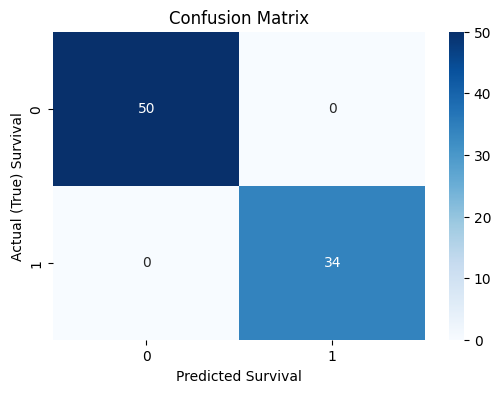

['titanic_model.pkl']

In [24]:
# Visualize confusion matrix
#To know the model performance
def visualize_results(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual (True) Survival')
    plt.xlabel('Predicted Survival')
    plt.savefig('confusion_matrix.png')
    plt.show()

# Run the program
X, y = preprocess_data(df)
model, accuracy, cm = train_evaluate_model(X, y)
print(f"\nModel Accuracy: {accuracy:.4f}")
visualize_results(cm)

# Save the model
# for using it later without retraining
import joblib
joblib.dump(model, 'titanic_model.pkl')